In [1]:
import tensorflow as tf
import pandas as pd 

### 1. Setup

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install -q Kaggle
!mkdir -p ~/.kaggle               # membuat folder .kaggle di root
!mv kaggle.json ~/.kaggle         # memindahkan file kaggle.json ke folder ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json  # merubah permission file kaggle.json

In [4]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 161MB/s]


In [5]:
import zipfile, os

local_zip = '/content/twitter-entity-sentiment-analysis.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

### 2. Load Data

In [6]:
tweet_df = pd.read_csv('twitter_training.csv',
                 names=['id','entity','sentiment','tweet'],
                 skiprows=1)

In [7]:
tweet_df.head()

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### 3. Data Cleansing 

3.1 Checking for Missing Value

In [9]:
tweet_df.isna().sum()

id             0
entity         0
sentiment      0
tweet        686
dtype: int64

In [10]:
tweet_df.loc[tweet_df['tweet'].isnull()]

,id,entity,sentiment,tweet
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


3.2 Droping all missing value on column tweet

Setelah melihat hasil sebelumnya, dapat dilihat bahwa semua data tidak memiliki tweet dan kita dapat membuang data-data tersebut.

In [11]:
tweet_df.dropna(subset=['tweet'], inplace=True)

tweet_df.shape

(73995, 4)

In [12]:
tweet_df.head()

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
tweet_df = tweet_df.drop(columns=[
    'id', 'entity'
])
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  73995 non-null  object
 1   tweet      73995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [14]:
tweet_df.head()

,sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [15]:
category = pd.get_dummies(tweet_df.sentiment)

tweet_df_baru = pd.concat([tweet_df, category], axis=1)
tweet_df_baru = tweet_df_baru.drop(columns=['sentiment'])
tweet_df_baru['tweet']=tweet_df_baru['tweet'].fillna('').apply(str)
tweet_df_baru.head()

,tweet,Irrelevant,Negative,Neutral,Positive
0,I am coming to the borders and I will kill you...,0,0,0,1
1,im getting on borderlands and i will kill you ...,0,0,0,1
2,im coming on borderlands and i will murder you...,0,0,0,1
3,im getting on borderlands 2 and i will murder ...,0,0,0,1
4,im getting into borderlands and i can murder y...,0,0,0,1


In [16]:
tweet = tweet_df_baru['tweet'].values
sentiment = tweet_df_baru[[
    'Irrelevant', 'Negative', 'Neutral',
    'Positive'
]].values

3.3 Stopwords

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("popular")

index = 0
while index < len(tweet):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  new_words = tokenizer.tokenize(str(tweet[index]))
  new_words = " ".join(new_words)

  stop_words = set(stopwords.words('english'))
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  word_tokens = tokenizer.tokenize(new_words)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  tweet[index] = " ".join(filtered_sentence)

  index = index+1

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

### 4. Data Preprocessing

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tweet, sentiment, test_size=0.2)

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='')
tokenizer.fit_on_texts(x_train)

sekuens_train = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

### 5. Training Model

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(526, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(526, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(526, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [52]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 128)               8320      
                                                                 
 dense_41 (Dense)            (None, 526)               67854     
                                                                 
 dropout_17 (Dropout)        (None, 526)               0         
                                                                 
 dense_42 (Dense)            (None, 526)              

In [72]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('val_accuracy') > 0.84 and logs.get('accuracy') > 0.84):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 84%!")
      self.model.stop_training = True

callbacks = myCallback()

In [87]:
num_epochs = 100

history = model.fit(
    padded_train, y_train,
    steps_per_epoch = 50,
    epochs=num_epochs,
    validation_data=(padded_test, y_test),
    batch_size=252,
    validation_steps = 50,
    verbose=2,
    callbacks = [callbacks]
)

Epoch 1/100

PELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 84%!
50/50 - 1s - loss: 0.1270 - accuracy: 0.9471 - val_loss: 0.7184 - val_accuracy: 0.8430 - 1s/epoch - 24ms/step


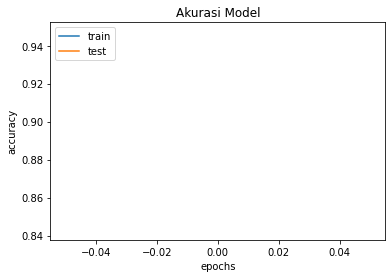

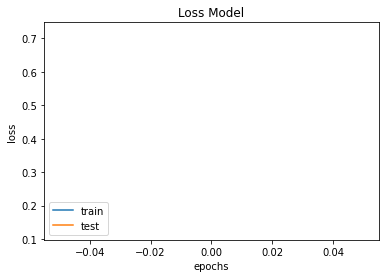

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower left')
plt.show()